In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from pprint import pprint
from scipy import stats
from sklearn import preprocessing
import seaborn as sns

from pandas_profiling import ProfileReport
import math

In [17]:
%matplotlib inline

In [2]:
TRAIN_PATH = "/workspace/data/titanic/train.csv"
train_df = pd.read_csv(TRAIN_PATH)

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# データの主な形状を確認

In [8]:
print("カラム数", len(train_df.columns))
print("カラム", list(train_df.columns))

カラム数 12
カラム ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [9]:
print("データ数", train_df.shape[0])

データ数 891


In [10]:
print("NULLの数")
train_df.isnull().sum()

NULLの数


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
print("生きた人数", train_df.query("Survived == 1").shape[0])
print("死んだ人数", train_df.query("Survived == 0").shape[0])

生きた人数 342
死んだ人数 549


# 各変数のヒストグラム

In [12]:
ProfileReport(train_df, minimal=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# 相関行列

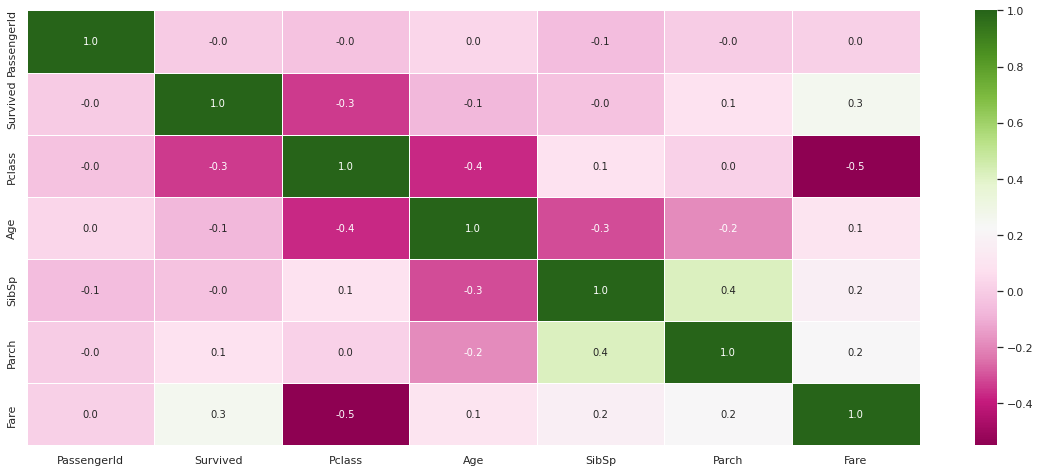

In [22]:
corr = train_df.corr()
sb.set(font_scale=1)
plt.figure(figsize=(20,8))

ax = sb.heatmap(corr, annot=True,annot_kws={"size": 10},fmt='.1f',cmap='PiYG', linewidths=.5)

# 目的変数との相関図

## チケットクラス（階級）と目的変数

階級が高い（Pclassが低い）ほど、生き残る確率は高いよう

Pclass:1の人数:216 生きた数:136 生きた確率0.63
Pclass:2の人数:184 生きた数:87 生きた確率0.473
Pclass:3の人数:491 生きた数:119 生きた確率0.242


Text(0.5, 1.0, 'Survived == 0 Pclass')

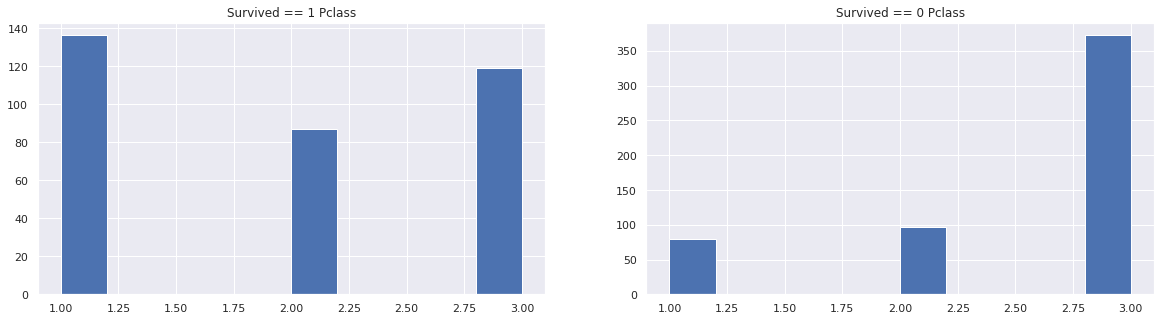

In [33]:
for i in sorted(train_df['Pclass'].unique()):
    _all = train_df.query("Pclass == @i").shape[0]
    _arrival = train_df.query("(Pclass == @i) & (Survived == 1)").shape[0]
    _ratio = round(_arrival / _all, 3)
    print(f"Pclass:{i}の人数:{_all} 生きた数:{_arrival} 生きた確率{_ratio}")

fig = plt.figure(figsize=(20,5))
ax = fig.subplots(1,2)

ax[0].hist(train_df.query("Survived == 1")['Pclass'])
ax[1].hist(train_df.query("Survived == 0")['Pclass'])

ax[0].set_title("Survived == 1 Pclass")
ax[1].set_title("Survived == 0 Pclass")

## 年齢の埋め方確認

Pclass × sex による穴埋めが良さそう（生存に関係しそうな変数で、平均年齢がかなり異なる）

Pclass:0 Sex:0 平均年齢：34.6　中央値：35.0
Pclass:0 Sex:1 平均年齢：41.3　中央値：40.0
Pclass:1 Sex:0 平均年齢：28.7　中央値：28.0
Pclass:1 Sex:1 平均年齢：30.7　中央値：30.0
Pclass:2 Sex:0 平均年齢：21.8　中央値：21.5
Pclass:2 Sex:1 平均年齢：26.5　中央値：25.0


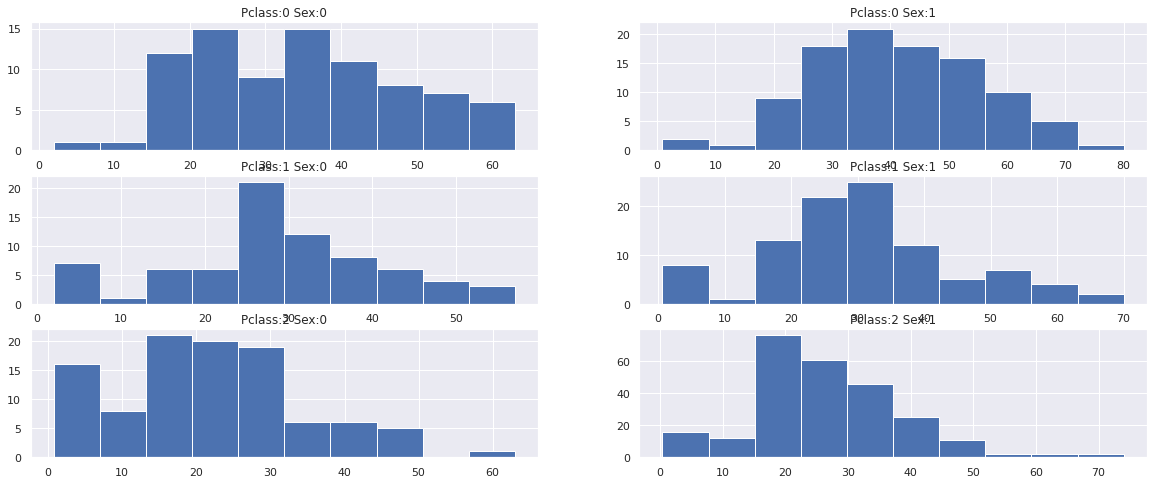

In [56]:
fig = plt.figure(figsize=(20,8))
ax = fig.subplots(3,2)

for i, pclass in enumerate(sorted(train_df['Pclass'].unique())):
    for n, sex in enumerate(sorted(train_df['Sex'].unique())):
        
        age_df = train_df.query("(Pclass == @pclass) & (Sex == @sex)")
        average_age = round(age_df["Age"].mean(), 1)
        median_age = round(age_df['Age'].median(), 1)
        print(f"Pclass:{i} Sex:{n} 平均年齢：{average_age}　中央値：{median_age}")
        
        ax[i,n].hist(age_df.dropna(subset=['Age'])["Age"])
        ax[i,n].set_title(f"Pclass:{i} Sex:{n}")
plt.show()

## 目的変数との関係性

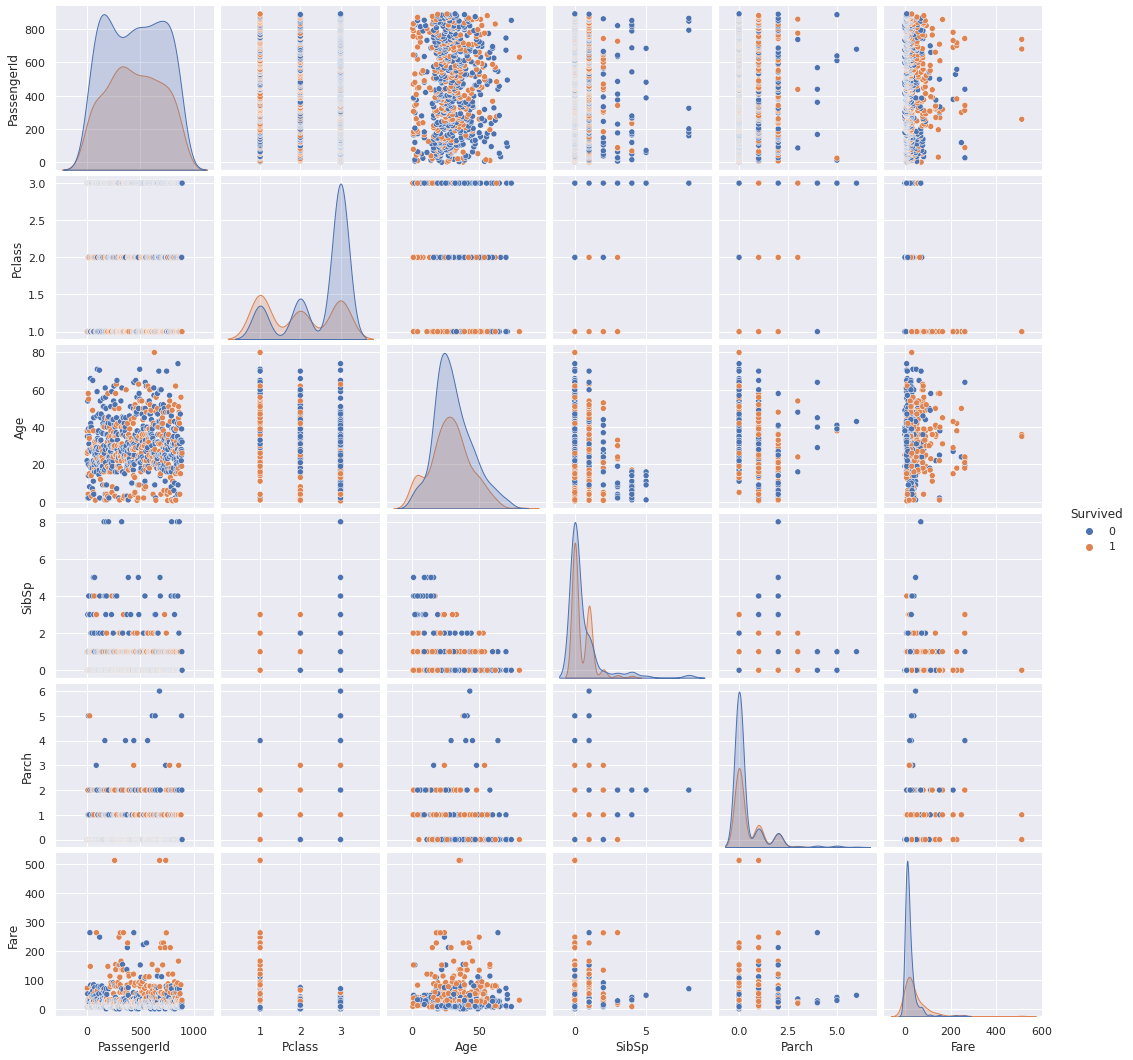

In [59]:
sns.pairplot(train_df, hue='Survived')
plt.show()